In [3]:
"""
1. Estimated depth of a decision tree, trained with 1 million data points.
    About round(np.log2(1000000),0) = 20 knots 
2. Gini blur of a node is generally smaller or bigger than the gini blur of it's parent?
    Usually the gini blur is decreasing the farther down we go in the decision tree, since the gini blur is a metric
    to measure how many different labels are still in a branch and the tree tries to separate the labels each decision.
    Therefore, it is likely but not guaranteed that the gini blur decreases over the decisions. From this we can derivate
    that a node's parent has either an equal or bigger gini blur value.
3. Lower max_depth in case of overfitting!
    Definetely. 
4. Scale data if decision tree is overfitting? 
    Decision trees are not sensitive to scaled data. It makes no difference.
5. It takes 1h to train a certain decision tree with 1 million datapoints. How long will it take for 10 million datapoints?
    11,67h
6. Presort is useful for 100.000 datapoints?
    No, presort only makes sense for up to a couple thousands of datapoints. From that points, it will trigger the opposite.

"""

"\n1. Estimated depth of a decision tree, trained with 1 million data points.\n    About round(np.log2(1000000),0) = 20 knots \n2. Gini blur of a node is generally smaller or bigger than the gini blur of it's parent?\n    Usually the gini blur is decreasing the farther down we go in the decision tree, since the gini blur is a metric\n    to measure how many different labels are still in a branch and the tree tries to separate the labels each decision.\n    Therefore, it is likely but not guaranteed that the gini blur decreases over the decisions. From this we can derivate\n    that a node's parent has either an equal or bigger gini blur value.\n3. Lower max_depth in case of overfitting!\n    Definetely. \n4. Scale data if decision tree is overfitting? \n    Decision trees are not sensitive to scaled data. It makes no difference.\n5. It takes 1h to train a certain decision tree with 1 million datapoints. How long will it take for 10 million datapoints?\n    11,67h\n6. Presort is useful 

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import ShuffleSplit

Best tree Acc:  0.858
Acc Forest:  0.8685
Acc Difference Change:  1.0500000000000065 %


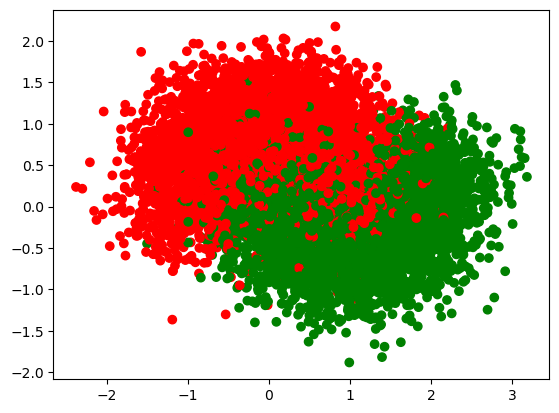

In [32]:
n = 10000

Xm,ym = make_moons(n_samples=n, noise=0.4)
colors = ['red' if value == 0 else 'green' for value in ym]
plt.scatter(Xm[:,0],Xm[:,1],c=colors)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xm,ym,test_size=0.2)

from sklearn.model_selection import GridSearchCV as GS
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = [
    {"max_leaf_nodes":[18,19,20,25,30],
     "max_depth":[6,7,8,9,10]}
]

grid_search = GS(dtc,
                 param_grid,
                 cv=5,
                 scoring="f1",
                 return_train_score=True
)

grid_search.fit(X_train,y_train) # Takes a while >3min
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train,y_train)

from sklearn.metrics import accuracy_score


# Best Tree Estimator

best_estimator.fit(X_train,y_train)
y_pred = best_estimator.predict(X_test)

from sklearn.metrics import accuracy_score
#acc_forest = accuracy_score(y_test, y_pred_forest)

acc_tree = accuracy_score(y_test, y_pred)
print("Best tree Acc: ",acc_tree)

# Setting up a random forest

nn = 1000
shuffle_split = ShuffleSplit(n_splits=nn,train_size=100)
from statistics import mode

predictions = []
for train_index, _ in shuffle_split.split(X_train):
    X_train_subset = X_train[train_index]
    y_train_subset = y_train[train_index]

    best_estimator.fit(X_train_subset,y_train_subset)
    y_predz = best_estimator.predict(X_test)
    predictions.append(y_predz)

y_pred_forest =[]
temp_pred = []

for j in range(len(predictions[0])): 
    for i in range(len(predictions)):
        temp_pred.append(predictions[i][j])
    y_pred_forest.append(mode(temp_pred))
    temp_pred = []

acc_forest = accuracy_score(y_test, y_pred_forest)
print("Acc Forest: ", acc_forest)
print("Acc Difference Change: ", (acc_forest - acc_tree) * 100, "%")